# Google Stock Price Prediction using RNN LTSM V2

This dataset has been downloaded from Google Stock. The prices are based on 2005 to 2021. The prediction will be done by using the Recurrent Neural Network & LTSM.

# Part 1 - Data Preprocessing

## Importing Essential Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Importing the dataset

In [9]:
df = pd.read_csv('Google 2005 to 2021.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2005-01-03,98.331429,101.439781,97.365051,100.976517,100.976517,31807176
1,2005-01-04,100.323959,101.086105,96.378746,96.886841,96.886841,27614921
2,2005-01-05,96.363808,98.082359,95.756081,96.393692,96.393692,16534946
3,2005-01-06,97.175758,97.584229,93.509506,93.922951,93.922951,20852067
4,2005-01-07,94.964050,96.762314,94.037521,96.563057,96.563057,19398238


## Data Exploratory

In [10]:
df.shape

(4279, 7)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4279 entries, 0 to 4278
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4279 non-null   object 
 1   Open       4279 non-null   float64
 2   High       4279 non-null   float64
 3   Low        4279 non-null   float64
 4   Close      4279 non-null   float64
 5   Adj Close  4279 non-null   float64
 6   Volume     4279 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 234.1+ KB


In [12]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4279.000000,4279.000000,4279.000000,4279.000000,4279.000000,4.279000e+03
mean,675.648346,682.081043,669.254529,675.882007,675.882007,6.196018e+06
std,609.676657,615.355387,604.573308,610.285840,610.285840,7.467570e+06
min,87.322693,88.866905,85.962791,87.168274,87.168274,7.922000e+03
25%,252.573296,254.755119,249.183503,252.242035,252.242035,1.548350e+06
50%,436.244843,438.625916,434.028168,436.558685,436.558685,3.646216e+06
75%,972.969971,979.365021,965.515015,972.759979,972.759979,7.767205e+06
max,3020.000000,3037.000000,2997.750000,3014.179932,3014.179932,8.254163e+07


In [13]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

We will the last columns 'close'.

In [14]:
df = df.drop(columns=['Adj Close'])

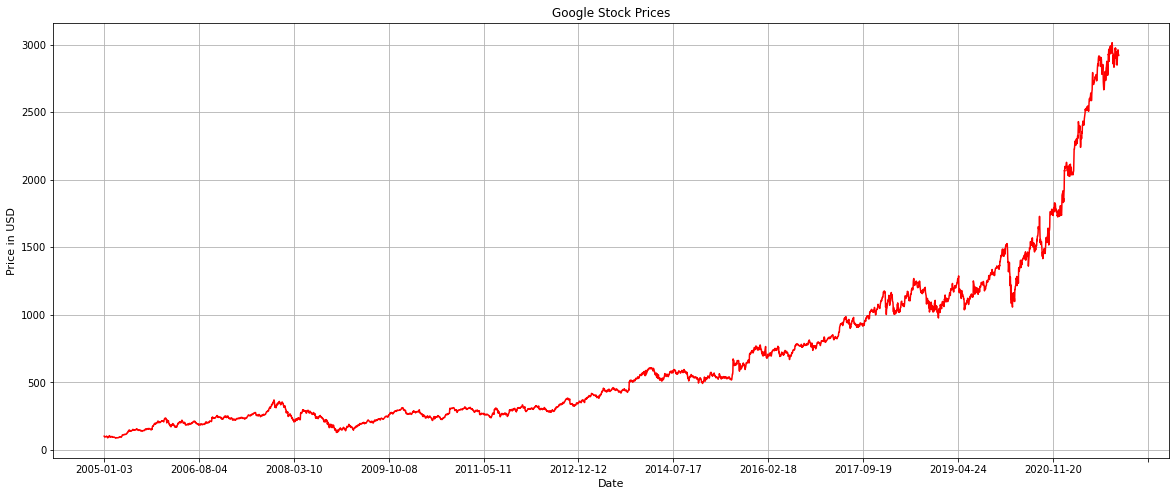

In [15]:
fig, ax = plt.subplots(figsize =(20,8))
ax.plot(df['Date'],df['Close'],color='Red')
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.set_xlabel('Date',fontsize='11')
ax.set_ylabel('Price in USD',fontsize='11')
plt.title('Google Stock Prices')
plt.grid()
plt.show()

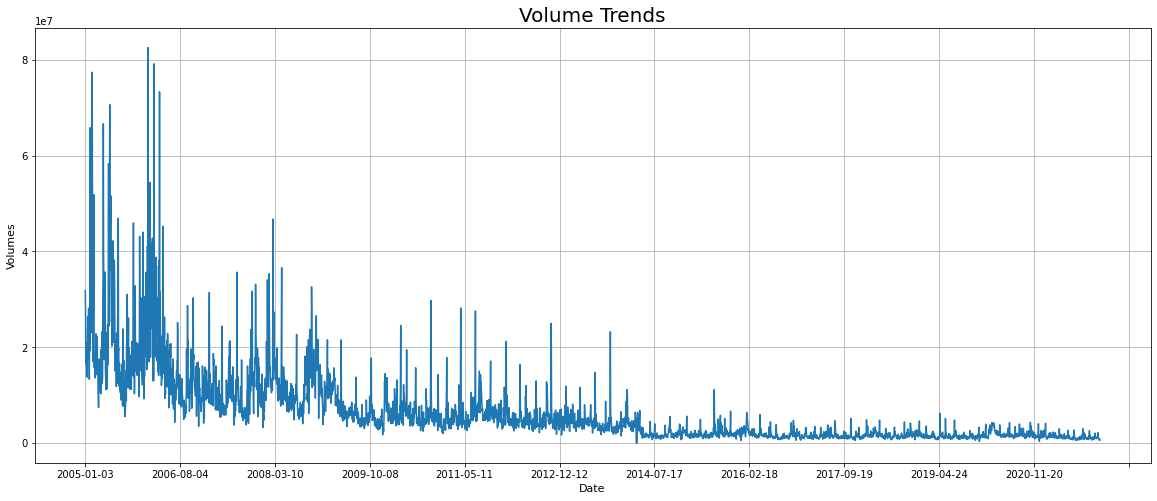

In [16]:
fig, ax = plt.subplots(figsize =(20,8))
ax.plot(df['Date'],df['Volume'])
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.set_xlabel('Date',fontsize='11')
ax.set_ylabel('Volumes',fontsize='11')
plt.title('Volume Trends', fontsize='20')
plt.grid()
plt.show()

In [17]:
df['Market Cap'] = df['Open'] * df['Volume']

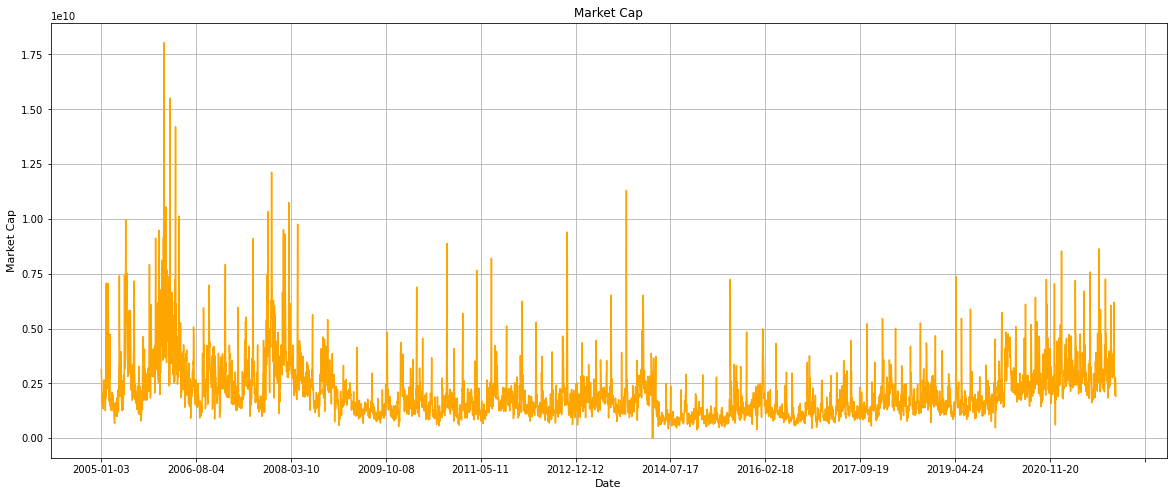

In [18]:
fig, ax = plt.subplots(figsize =(20,8))
ax.plot(df['Date'],df['Market Cap'], color='orange')
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.set_xlabel('Date',fontsize='11')
ax.set_ylabel('Market Cap',fontsize='11')
plt.title('Market Cap')
plt.grid()
plt.show()

In [19]:
df.iloc[df['Market Cap'].argmax()]

Date                 2006-01-20
Open                 218.530899
High                 219.193405
Low                  196.632965
Close                198.984161
Volume                 82541631
Market Cap    18037896827.35627
Name: 264, dtype: object

In [24]:
df['vol']=(df['Close']/df['Close'].shift(1))-1

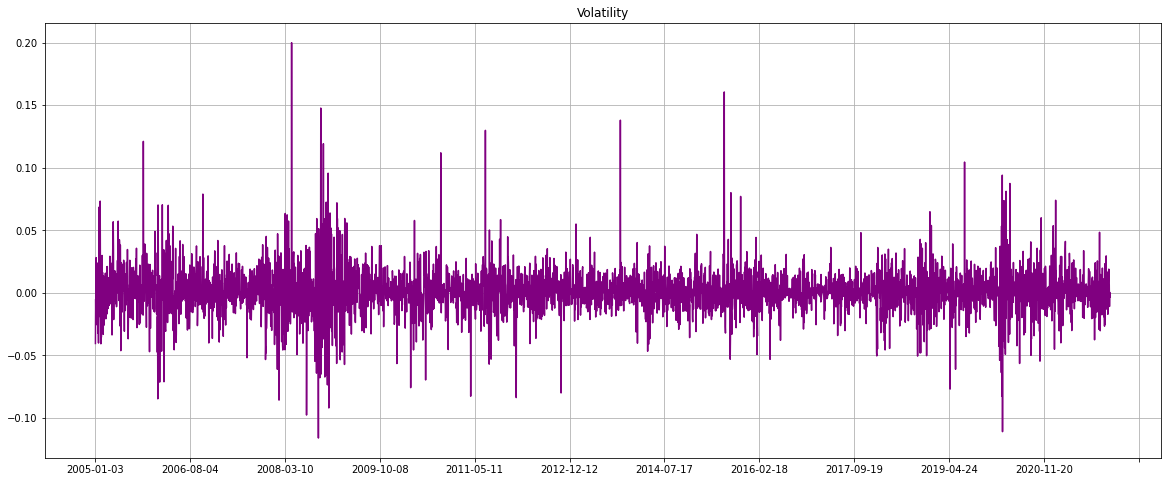

In [25]:
fig,ax=plt.subplots(figsize=(20,8))
ax.plot(df['Date'],df['vol'],color='purple')
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
plt.title('Volatility')
plt.grid()
plt.show()

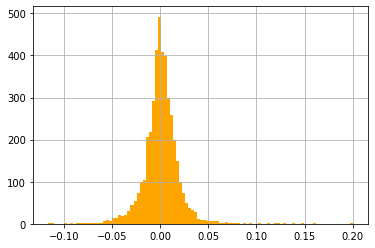

In [26]:
df['vol'].hist(bins=100,color='orange');

In [27]:
df['Cumulative Return']=(1+df['vol']).cumprod()

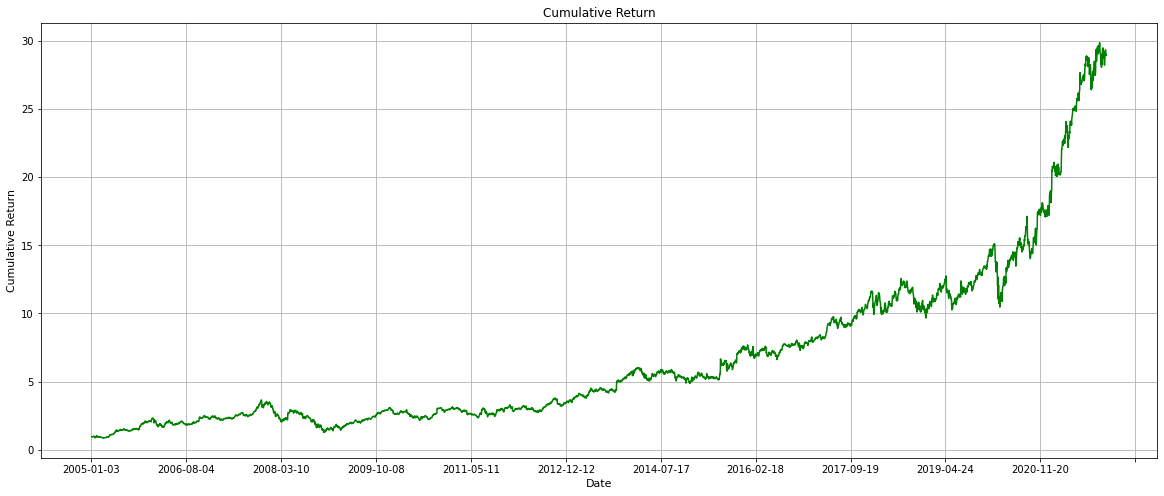

In [28]:
fig, ax = plt.subplots(figsize =(20,8))
ax.plot(df['Date'],df['Cumulative Return'], color='green')
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.set_xlabel('Date',fontsize='11')
ax.set_ylabel('Cumulative Return',fontsize='11')
plt.title('Cumulative Return')
plt.grid()
plt.show()

In [29]:
df.iloc[df['Cumulative Return'].argmax()]

Date                      2021-11-18
Open                     2982.919922
High                     3032.199951
Low                      2979.969971
Close                    3014.179932
Volume                       1332900
Market Cap           3975933964.0338
vol                         0.011049
Cumulative Return          29.850306
Name: 4250, dtype: object

## Features Scaling

Features Scaling can be done by: 
* Standardization = (x-mean(x)) / standard deviation(x)
*   Normalization = (x-min(x)) / (max(x)-min(x))

It is recommended for this case to use normalization because our RNN model will be using the "sigmoid" function in the output RNN layer.
Thus, we will use MinMaxScaler class. The feature range (0, 1) means that all the new scale stock prices will be between 0 & 1 in addition to the fact that the normalization is based on the max minus min where max is larger than min.


In [30]:
from sklearn.preprocessing import MinMaxScaler
import math

In [31]:
df['Date']=pd.to_datetime(df['Date'])
df.set_index('Date',inplace=True)

In [32]:
data = df.filter(['Close'])
dataset = data.values
training_data_len =math.ceil(len(dataset)*.8)
training_data_len

3424

In [33]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)
scaled_data

array([[0.00471752],
       [0.0033203 ],
       [0.00315182],
       ...,
       [0.97088499],
       [0.97127109],
       [0.96784096]])

## Creating a data structure with 60 timesteps and 1 output

60 time steps means that at each time T, the RNN is going to look at the 60 stock prices before time T, that is the stock prices between 60 days before time T and time T.

Based on the trends it is capturing during these 60 previous timesteps, it will try to predict the next output.

So 60 timesteps of the past information from which our RNN is gonna try to learn and understand some correlations, or some trends, and based on its understanding, it's going to try to predict the next output.


In [34]:
train_data = scaled_data[0:training_data_len, :]
x_train=[]
y_train=[]
for i in range (60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i <= 60:
    print (x_train)
    print (y_train)
    print()

[array([0.00471752, 0.0033203 , 0.00315182, 0.0023077 , 0.00320968,
       0.00341561, 0.00315693, 0.00347007, 0.00346156, 0.00425122,
       0.00492004, 0.00379682, 0.0032216 , 0.00226176, 0.00097516,
       0.00036249, 0.00242513, 0.00222772, 0.00261234, 0.00351091,
       0.00287782, 0.00527062, 0.00610453, 0.00499833, 0.00358069,
       0.00402487, 0.00282337, 0.0022107 , 0.00211199, 0.00306333,
       0.00344454, 0.00398573, 0.00389893, 0.00390744, 0.00278763,
       0.0032267 , 0.00236557, 0.00185161, 0.0022124 , 0.00188394,
       0.00173418, 0.00204562, 0.00185672, 0.00235195, 0.00173759,
       0.00108237, 0.00084922, 0.00047822, 0.        , 0.00061607,
       0.00010381, 0.00073179, 0.00085943, 0.00100239, 0.00061437,
       0.00067904, 0.00072499, 0.00109429, 0.00077945, 0.00092921])]
[0.0009394205836128593]



## Data Reshaping

In [35]:
x_train,y_train=np.array(x_train),np.array(y_train)

In [36]:
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(3364, 60, 1)

# Part 2 - Building and Training the RNN

## Importing the Keras libraries and packages

In [37]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

## Building the RNN Model

In [38]:
model = Sequential()
model.add(LSTM(64,return_sequences=True,input_shape =(x_train.shape[1],1)))
model.add(LSTM(64, return_sequences = False))
model.add(Dense(32))
model.add(Dense(1))

## Compiling the RNN

The Adam optimizer is always a safe choice. It's always a good choice because it is very powerful and it always performs some relevant updates of the weights.
The loss is "mean_sqiared_error" because this is a regression problem.

In [40]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

## Training the RNN Model

In [41]:
model.fit(x_train, y_train, epochs = 30, batch_size = 1)

Epoch 1/30
3364/3364 [==============================] - 99s 28ms/step - loss: 1.7471e-04
Epoch 2/30
3364/3364 [==============================] - 95s 28ms/step - loss: 1.0365e-04
Epoch 3/30
3364/3364 [==============================] - 95s 28ms/step - loss: 5.2635e-05
Epoch 4/30
3364/3364 [==============================] - 96s 28ms/step - loss: 4.5383e-05
Epoch 5/30
3364/3364 [==============================] - 95s 28ms/step - loss: 4.0214e-05
Epoch 6/30
3364/3364 [==============================] - 94s 28ms/step - loss: 3.5438e-05
Epoch 7/30
3364/3364 [==============================] - 94s 28ms/step - loss: 2.7057e-05
Epoch 8/30
3364/3364 [==============================] - 95s 28ms/step - loss: 2.7712e-05
Epoch 9/30
3364/3364 [==============================] - 94s 28ms/step - loss: 2.9936e-05
Epoch 10/30
3364/3364 [==============================] - 94s 28ms/step - loss: 3.0836e-05
Epoch 11/30
3364/3364 [==============================] - 94s 28ms/step - loss: 2.8199e-05
Epoch 12/30
3364/33

# Part 3 - Making the Predictions and Visualising the Results

In [42]:
test_data = scaled_data[training_data_len-60:, :]
x_test=[]
y_test=dataset[training_data_len:,:]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [43]:
x_test=np.array(x_test)

In [44]:
x_test=np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))
x_test.shape

(855, 60, 1)

In [45]:
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)

In [46]:
from sklearn.metrics import mean_squared_error
rmse=np.sqrt(np.mean(predictions-y_test)**2)
rmse

98.22525429207786

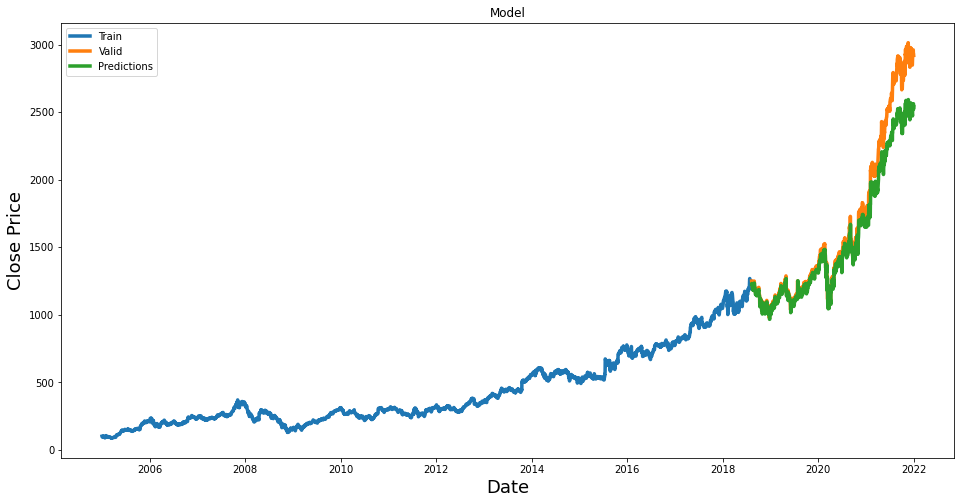

In [47]:
train=data[:training_data_len]
valid=data[training_data_len:]
valid['Predictions']=predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price',fontsize=18)
plt.plot(train['Close'],linewidth=3.5)
plt.plot(valid[['Close','Predictions']],linewidth=3.5)
plt.legend(['Train','Valid','Predictions'],loc='upper_center')

In [48]:
valid

,Close,Predictions
Date,,
2018-08-09,1249.099976,1226.690308
2018-08-10,1237.609985,1231.195068
2018-08-13,1235.010010,1216.305664
2018-08-14,1242.099976,1215.496460
2018-08-15,1214.380005,1222.545654
...,...,...
2021-12-23,2942.850098,2544.596436
2021-12-27,2961.280029,2540.811279
2021-12-28,2928.959961,2562.620605


In [49]:
google_quote=pd.read_csv('Google 2005 to 2021.csv')
new_google_data=google_quote.filter(['Close'])
last_60_days=new_google_data[-60:].values
last_60_days_scaled=scaler.transform(last_60_days)
X_test=[]
X_test.append(last_60_days_scaled)
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
pred_price=model.predict(X_test)
pred_price=scaler.inverse_transform(pred_price)
pred_price

array([[2516.4802]], dtype=float32)